In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
X_train.size

47040000

In [5]:
X_train.shape

(60000, 28, 28)

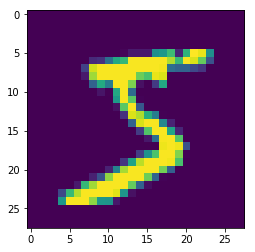

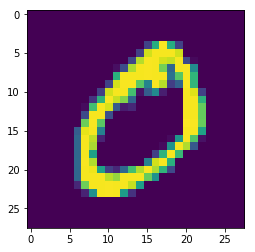

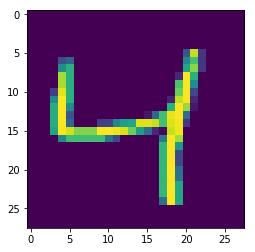

In [6]:
for i in range(3):
  plt.imshow(X_train[i])
  plt.show()

In [7]:
X = tf.placeholder(tf.float32, shape=(None,28,28,None))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")
with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: X_})

NameError: name 'filters' is not defined

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(42,activation=tf.nn.relu),
    tf.keras.layers.Dense(42,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                          ])

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 15s 254us/sample - loss: 1.4822 - acc: 0.7542
Epoch 2/10
60000/60000 [==============================] - 13s 225us/sample - loss: 0.4228 - acc: 0.8888
Epoch 3/10
60000/60000 [==============================] - 14s 226us/sample - loss: 0.3421 - acc: 0.9101
Epoch 4/10
60000/60000 [==============================] - 14s 227us/sample - loss: 0.3006 - acc: 0.9213
Epoch 5/10
60000/60000 [==============================] - 14s 240us/sample - loss: 0.2536 - acc: 0.9319
Epoch 6/10
60000/60000 [==============================] - 15s 244us/sample - loss: 0.2349 - acc: 0.9354
Epoch 7/10
60000/60000 [==============================] - 14s 241us/sample - loss: 0.2110 - acc: 0.9413
Epoch 8/10
60000/60000 [==============================] - 22s 362us/sample - loss: 0.1970 - acc: 0.9449
Epoch 9/10
60000/60000 [==============================] - 28s 466us/sample - loss: 0.1867 - acc: 0.9486
Epoch 10/10
60000/60000 [==============================] - 24s 3

In [12]:
test_loss,test_acc = model.evaluate(X_test,y_test,batch_size=50)

10000/10000 [==============================] - 1s 88us/sample - loss: 0.2140 - acc: 0.9421


In [13]:
pred = model.predict(X_test)

In [14]:
pred[0]

array([3.6599354e-10, 1.5318743e-06, 6.8070847e-05, 9.1947627e-04,
       1.7062024e-07, 6.4394928e-10, 3.3214310e-14, 9.9900252e-01,
       1.7998315e-07, 7.9207430e-06], dtype=float32)

<function matplotlib.pyplot.show(*args, **kw)>

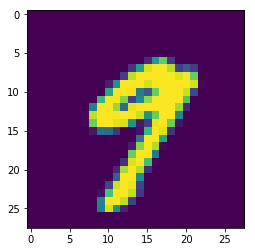

In [31]:
plt.imshow(X_test[20])
plt.show

In [33]:
y_test[20]

9

In [34]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)
  
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
  
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('green')
    thisplot[true_label].set_color('red')

In [35]:
img = (np.expand_dims(X_test[20],0))
img.shape

(1, 28, 28)

In [36]:
prediction = model.predict(img)

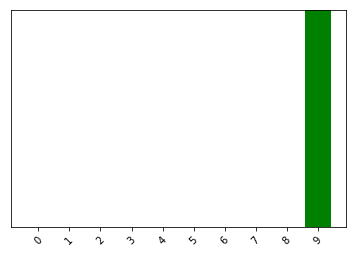

In [37]:
plot_value_array(0,prediction, y_test)
plt.xticks(range(10), range(10), rotation=45)
plt.show()